# 単語ベクトル
## 単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．
#### https://nlp100.github.io/ja/ch07.html

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/iamtatsuki05/NLP_100/blob/NLP_100_9/NLP_100_7.ipynb)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 単語ベクトルの読み込みと表示
## Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [1]:
#!wget https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g

In [ ]:
FILE_ID = "0B7XkCwpI5KDYNlNUTTlSS21pQmM"
FILE_NAME = "GoogleNews-vectors-negative300.bin.gz"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt

--2022-03-21 10:59:44--  https://docs.google.com/uc?export=download&confirm=t&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
Resolving docs.google.com (docs.google.com)... 142.250.141.102, 142.250.141.113, 142.250.141.100, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dih8n92b4pk9mdtmu30u4s9fiidcpul9/1647860325000/06848720943842814915/*/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download [following]
--2022-03-21 10:59:45--  https://doc-0g-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dih8n92b4pk9mdtmu30u4s9fiidcpul9/1647860325000/06848720943842814915/*/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download
Resolving doc-0g-8s-docs.googleusercontent.com (doc-0g-8s-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to doc-0g-8s-docs.googleusercontent.com (doc-0g-8s-docs.goog

In [ ]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz' , binary=True)

In [ ]:
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

In [ ]:
#参考https://skume.net/entry/2020/11/23/043738
# https://blog.amedama.jp/entry/gensim-fasttext-pre-trained-word-vectors

# 単語の類似度
## “United States”と”U.S.”のコサイン類似度を計算せよ

In [ ]:
model.similarity('United_States', 'U.S.')

0.73107743

In [ ]:
#https://qiita.com/DancingEnginee1/items/b10c8ef7893d99aa53be

#  類似度の高い単語10件
## “United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [ ]:
model.most_similar(['United_States'] , [] , 10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

In [ ]:
#参考https://www.google.com/search?q=most_similar&sxsrf=APq-WBsf2tcpBPSTroJK4JcGk9mRtGKwxA%3A1647830959279&ei=r-c3YsTWEMul2roPo5GA6AU&ved=0ahUKEwiE6ujXmNb2AhXLklYBHaMIAF0Q4dUDCA4&uact=5&oq=most_similar&gs_lcp=Cgdnd3Mtd2l6EAMyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgQIABAeMgQIABAeMgQIABAeMgQIABAeOgcIIxDqAhAnSgQIQRgASgQIRhgAUNMHWNMHYL8KaAFwAXgAgAFUiAFUkgEBMZgBAKABAaABArABCsABAQ&sclient=gws-wiz
# https://teratail.com/questions/306461
# https://qiita.com/iss-f/items/aec567ee5c79464413dc

# 加法構成性によるアナロジー
## “Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [ ]:
model.most_similar(positive = ['Spain' , 'Athens'] , negative = ['Madrid'] , topn =10)

[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

# アナロジーデータでの実験
## 単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [ ]:
!wget http://download.tensorflow.org/data/questions-words.txt

--2022-03-21 11:02:40--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.141.128, 2607:f8b0:4023:c0b::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.141.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.002s  

2022-03-21 11:02:40 (262 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [ ]:
!head -30 questions-words.txt

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba
Athens Greece Helsinki Finland
Athens Greece Islamabad Pakistan
Athens Greece Kabul Afghanistan
Athens Greece London England
Athens Greece Madrid Spain
Athens Greece Moscow Russia
Athens Greece Oslo Norway
Athens Greece Ottawa Canada
Athens Greece Paris France
Athens Greece Rome Italy
Athens Greece Stockholm Sweden
Athens Greece Tehran Iran
Athens Greece Tokyo Japan
Baghdad Iraq Bangkok Thailand
Baghdad Iraq Beijing China
Baghdad Iraq Berlin Germany
Baghdad Iraq Bern Switzerland
Baghdad Iraq Cairo Egypt
Baghdad Iraq Canberra Australia
Baghdad Iraq Hanoi Vietnam


In [ ]:
# Athens Greece Tokyo Japan
# Baghdad Iraq Bangkok Thailand

with open('questions-words.txt' , 'r') as f1:
    questions = f1.readlines()

with open('result.txt' , 'w') as f2:
    for idx , question in enumerate(questions):
        words = question.split()
        if len(words) == 4:
            scores = model.most_similar(positive=[words[1] , words[2]], negative=[words[0]] , topn=1)[0]
            words += [scores[0] , str(scores[1])]
            output = ' '.join(words) + '\n'
        else:
            output = question
        f2.write(output)

In [ ]:
!head -30 result.txt

: capital-common-countries
Athens Greece Baghdad Iraq Iraqi 0.6351870894432068
Athens Greece Bangkok Thailand Thailand 0.7137669324874878
Athens Greece Beijing China China 0.7235777974128723
Athens Greece Berlin Germany Germany 0.6734622120857239
Athens Greece Bern Switzerland Switzerland 0.4919748306274414
Athens Greece Cairo Egypt Egypt 0.7527809739112854
Athens Greece Canberra Australia Australia 0.583732545375824
Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
Athens Greece Havana Cuba Cuba 0.6460992097854614
Athens Greece Helsinki Finland Finland 0.6899983882904053
Athens Greece Islamabad Pakistan Pakistan 0.7233326435089111
Athens Greece Kabul Afghanistan Afghan 0.6160915493965149
Athens Greece London England Britain 0.5646188259124756
Athens Greece Madrid Spain Spain 0.703661322593689
Athens Greece Moscow Russia Russia 0.7382972240447998
Athens Greece Oslo Norway Norway 0.6470743417739868
Athens Greece Ottawa Canada Canada 0.5912168025970459
Athens Greece Paris France Fr

# アナロジータスクでの正解率
## 64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [ ]:
from sklearn.metrics import accuracy_score

with open('result.txt' , 'r') as f:
    results = f.read()
txts = results.splitlines()
label_true = []
label_pred = []
for txt in txts:
    words = txt.split(' ') 
    if words[0] == ':':
        continue
    label_true.append(words[3])
    label_pred.append(words[4])

print(accuracy_score(label_true , label_pred))

0.7358780188293083


In [ ]:
#参考https://itsakura.com/python-startswith

# WordSimilarity-353での評価
## The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [ ]:
!wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip

--2022-03-21 12:59:32--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 208.97.177.37
Connecting to www.gabrilovich.com (www.gabrilovich.com)|208.97.177.37|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip [following]
--2022-03-21 12:59:32--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 208.97.177.37
Connecting to gabrilovich.com (gabrilovich.com)|208.97.177.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K  --.-KB/s    in 0.07s   

2022-03-21 12:59:32 (312 KB/s) - ‘wordsim353.zip’ saved [23257/23257]



In [ ]:
!unzip wordsim353.zip

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  inflating: set2.csv                
  inflating: combined.tab            
  inflating: set1.tab                
  inflating: set2.tab                
  inflating: instructions.txt        


In [ ]:
!head -10 'combined.csv'

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50


In [ ]:
#単語ベクトルにより計算される類似度
w_s_353 = []
with open('./combined.csv' , 'r') as f:
  next(f)
  for txt in f:
    words = [_.strip() for _ in txt.split(',')]
    words.append(model.similarity(words[0] , words[1]))
    w_s_353.append(words)

for _ in range(30):
  print(w_s_353[_])

['love', 'sex', '6.77', 0.2639377]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 0.99999994]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]
['computer', 'internet', '7.58', 0.40686232]
['plane', 'car', '5.77', 0.3779698]
['train', 'car', '6.31', 0.3402561]
['telephone', 'communication', '7.50', 0.33218452]
['television', 'radio', '6.77', 0.6114971]
['media', 'radio', '7.42', 0.3899161]
['drug', 'abuse', '6.85', 0.24085768]
['bread', 'butter', '6.19', 0.6417261]
['cucumber', 'potato', '5.92', 0.5678562]
['doctor', 'nurse', '7.00', 0.63195235]
['professor', 'doctor', '6.62', 0.21336083]
['student', 'professor', '6.81', 0.4206618]
['smart', 'student', '4.62', 0.066302165]
['smart', 'stupid', '5.81', 0.47047195]
['company', 'stock', '7.08', 0.34156868]
['stock', 'market', '8.08', 0.4680556]
['stock', 'phone', '1.62', 0.123267554]
['stock', 'CD', '1.31', 0.06611791]
['stock', 'jaguar', '0.92', 0.036066912]
['stock', 'egg', '1.81', 0.10417

In [ ]:
import numpy as np
from scipy.stats import spearmanr

human = np.array(w_s_353).T[2]
w2v = np.array(w_s_353).T[3]

correlation , pvalue = spearmanr(human , w2v)
print(correlation)

0.6849564489532377


In [ ]:
#参考https://qiita.com/dacciinfo/items/88debe69f9f4e927aafc

# k-meansクラスタリング
## 国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ

In [ ]:
from sklearn.cluster import KMeans
import gensim

with open('questions-words.txt' , 'r') as f:
    questions = f.read()

# 国名
countries = set()
for txt in questions.splitlines():
    words = txt.split(' ')
    if words[0] == ':':
        if words[1] == 'currency':
            break
        continue
    countries.add(words[1])
countries = list(countries)

# 国名に関する単語ベクトルを抽出
countries_vec = model[countries]

In [ ]:
km = KMeans(n_clusters = 5 , random_state = 42)
km.fit(countries_vec)

predict_list = list(km.predict(model[countries]))

for _ in range(5):
    print(_ , ' : ')
    country_class = sorted([countries[num] for num in range(len(predict_list)) if predict_list[num] == _])
    print(' '.join(country_class))

0  : 
Armenia Azerbaijan Belarus Kazakhstan Kyrgyzstan Moldova Russia Tajikistan Turkmenistan Ukraine Uzbekistan
1  : 
Algeria Angola Botswana Burundi Eritrea Gabon Gambia Ghana Guinea Kenya Liberia Madagascar Malawi Mali Mauritania Mozambique Namibia Niger Nigeria Rwanda Senegal Somalia Sudan Tunisia Uganda Zambia Zimbabwe
2  : 
Albania Austria Belgium Bulgaria Croatia Cyprus Denmark England Estonia Finland France Georgia Germany Greece Greenland Hungary Ireland Italy Latvia Liechtenstein Lithuania Macedonia Malta Montenegro Norway Poland Portugal Romania Serbia Slovakia Slovenia Spain Sweden Switzerland Turkey
3  : 
Bahamas Belize Bhutan Canada Chile Cuba Dominica Ecuador Fiji Guyana Honduras Jamaica Laos Nepal Nicaragua Peru Philippines Samoa Suriname Taiwan Tuvalu Uruguay Venezuela
4  : 
Afghanistan Australia Bahrain Bangladesh China Egypt Indonesia Iran Iraq Japan Jordan Lebanon Libya Morocco Oman Pakistan Qatar Syria Thailand Vietnam


# Ward法によるクラスタリング
## 国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

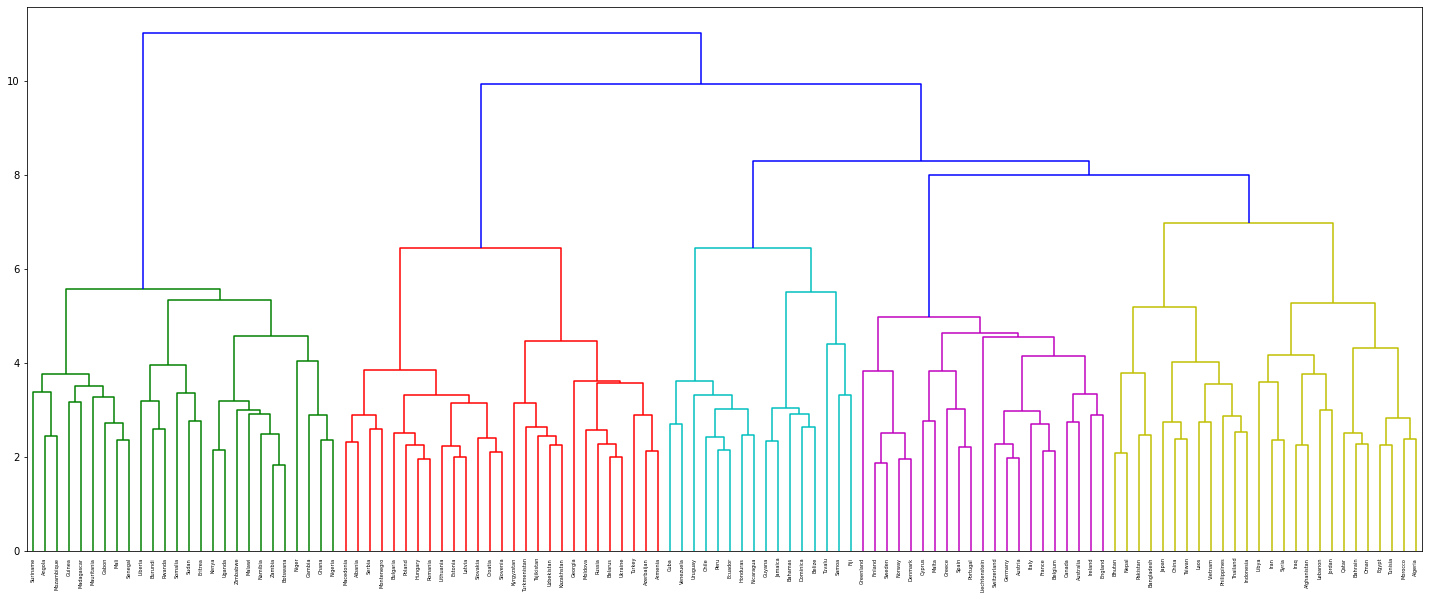

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

#作図
plt.figure(figsize=(25 , 10))
link = linkage(countries_vec , method='ward')
dendrogram(link , labels=countries)
plt.show()

In [ ]:
#参考https://qiita.com/pontyo4/items/a2e7dec57c3699c519a5
#https://di-acc2.com/programming/python/4478/

# t-SNEによる可視化
## ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


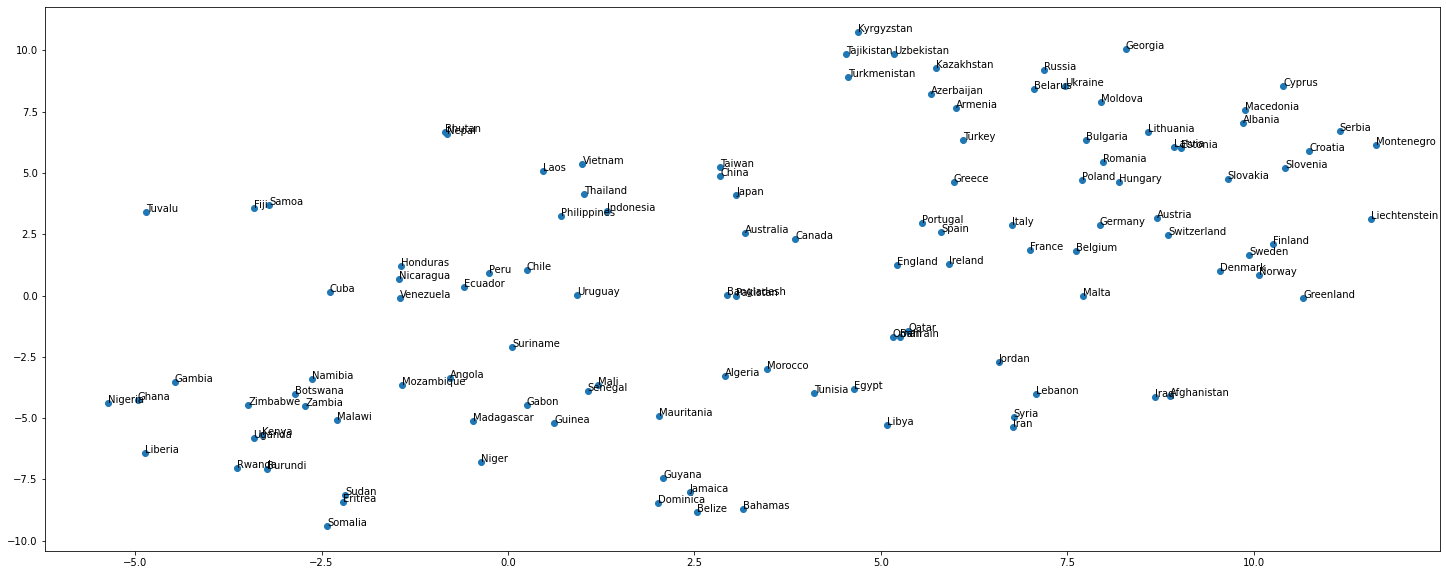

In [ ]:
#model,data
from sklearn.manifold import TSNE

ts = TSNE(n_components = 2 , random_state = 42) #n_components=2　次元
country_vec_embedded = ts.fit_transform(countries_vec)
xs = [_[0] for _ in country_vec_embedded]
ys = [_[1] for _ in country_vec_embedded]

#作図
fig = plt.figure(figsize=(25 , 10))
plt.scatter(xs , ys)
ax = plt.gca() #Pyplotインターフェースからオブジェクト指向インターフェースに切り替える

for idx , country in enumerate(countries):
    ax.annotate(country, (xs[idx] , ys[idx]))
plt.show()

In [ ]:
#参考https://qiita.com/g-k/items/120f1cf85ff2ceae4aba
#https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9